# t-sne 觀察 : 分群

# [教學目標]
- 觀察雙同心圓使用 t-SNE 在不同困惑度 (perplexity) 下的分群效果  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 使用同心圓的資料, 觀察 t-sne 在不同困惑度 (perplexity) 下, 分群的效果如何變化 (In[4], Out[4])

In [3]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [4]:
plt.ioff()

# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定同心圓資料點 , factor = 外圈與內圈的比例
# return X : array of shape [n_samples, 2], y : array of shape [n_samples]
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
red = y == 0 # 將 y 為 0 的 index set 存成變數 red
green = y == 1 # 將 y 為 1 的 index set 存成變數 green

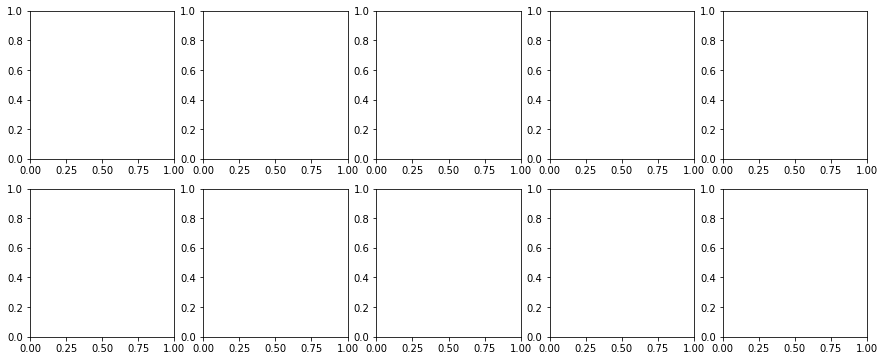

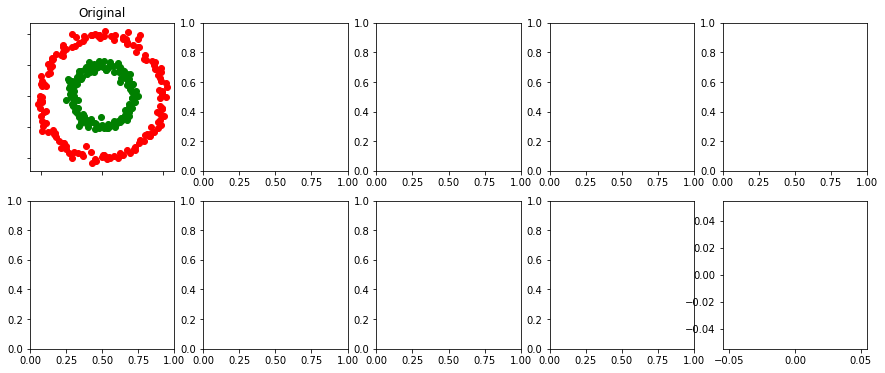

In [5]:
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

circles, perplexity=4 in 3.1 sec
circles, perplexity=6 in 3.2 sec
circles, perplexity=9 in 3.7 sec
circles, perplexity=14 in 4 sec
circles, perplexity=21 in 4.5 sec
circles, perplexity=30 in 4.4 sec
circles, perplexity=45 in 4.8 sec
circles, perplexity=66 in 6.7 sec
circles, perplexity=100 in 9.8 sec


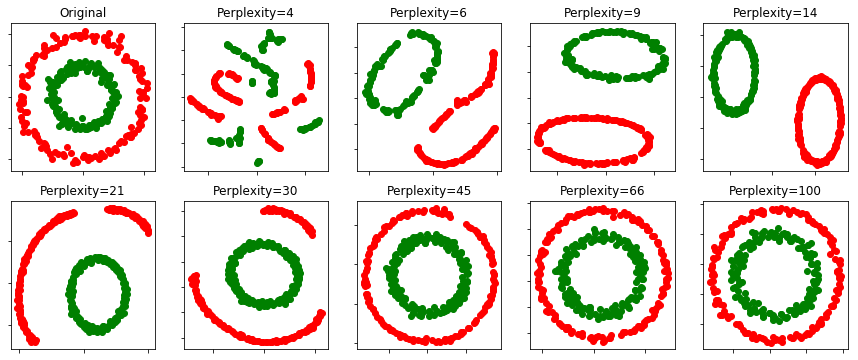

In [6]:
# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()
fig

# 觀察結果
* perplexity 越低時, 圖形越零散, 越高時不僅分群好, 也讓圖形更接近原圖
* 但 perplexity 越高, 執行時間也越久